In [143]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [144]:
#import table of per game stats from 2010-2022
season_log = pd.read_csv("league_pergame_stats.csv")

In [145]:
season_log.head()

,Yr,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2022,League Average,82,241.4,40.6,88.1,0.461,12.4,35.2,0.354,...,0.775,10.3,34.1,44.5,24.6,7.6,4.7,13.8,19.6,110.6
1,2021,League Average,72,241.4,41.2,88.4,0.466,12.7,34.6,0.367,...,0.778,9.8,34.5,44.3,24.8,7.6,4.9,13.8,19.3,112.1
2,2020,League Average,71,241.8,40.9,88.8,0.460,12.2,34.1,0.358,...,0.773,10.1,34.8,44.8,24.4,7.6,4.9,14.5,20.8,111.8
3,2019,League Average,82,241.6,41.1,89.2,0.461,11.4,32.0,0.355,...,0.766,10.3,34.8,45.2,24.6,7.6,5.0,14.1,20.9,111.2
4,2018,League Average,82,241.4,39.6,86.1,0.460,10.5,29.0,0.362,...,0.767,9.7,33.8,43.5,23.2,7.7,4.8,14.3,19.9,106.3


In [146]:
season_log.columns

Index(['Yr', 'Team', 'G', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P',
       '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [147]:
# observe different plot sytles in matplotlib
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


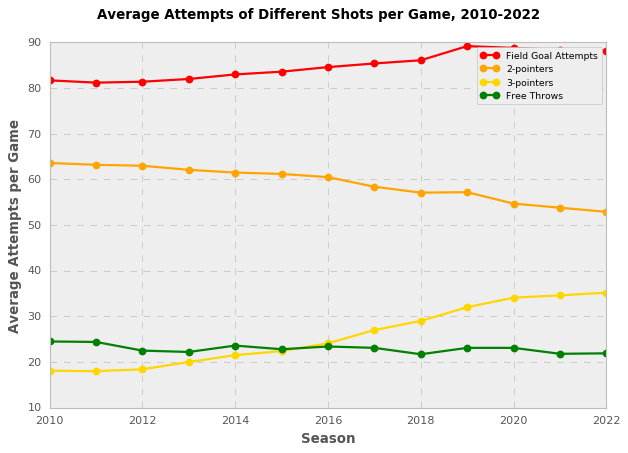

In [209]:
# plot shot avg per-game attempts from season_log table
plt.style.use('bmh')
plt.plot(season_log["Yr"], season_log["FGA"], marker = "o", color = "red")
plt.plot(season_log["Yr"], season_log["2PA"], marker = "o", color = "orange")
plt.plot(season_log["Yr"], season_log["3PA"], marker = "o", color = "gold")
plt.plot(season_log["Yr"], season_log["FTA"], marker = "o", color = "green")
plt.legend(["Field Goal Attempts","2-pointers", "3-pointers","Free Throws"], loc = "upper right", fontsize="small")
plt.xlabel("Season", fontweight="bold")
plt.ylabel("Average Attempts per Game", fontweight="bold")
plt.suptitle("Average Attempts of Different Shots per Game, 2010-2022", fontsize = "large", fontweight="bold")
plt.gca().get_xaxis().get_major_formatter().set_useOffset(False)
plt.show()

In [149]:
# import schedule of regular season games from 2011 season to 2022 season
game_log = pd.read_csv("/Users/bryanokani/Desktop/The Midrange/Projects/Margin of Victory/data/nba_reg_season_2011-22.csv")

In [150]:
game_log.head()

,Date,Start (ET),Visitor/Neutral,PTS_Visitor,Home/Neutral,PTS_Home,OT?,Attend.,Arena,Notes,Season
0,Tue Oct 26 2010,7:30p,Miami Heat,80,Boston Celtics,88,NaN,18624.0,TD Garden,NaN,2011
1,Tue Oct 26 2010,10:00p,Phoenix Suns,92,Portland Trail Blazers,106,NaN,20603.0,Rose Garden Arena,NaN,2011
2,Tue Oct 26 2010,10:30p,Houston Rockets,110,Los Angeles Lakers,112,NaN,18997.0,STAPLES Center,NaN,2011
3,Wed Oct 27 2010,7:00p,Boston Celtics,87,Cleveland Cavaliers,95,NaN,20562.0,Quicken Loans Arena,NaN,2011
4,Wed Oct 27 2010,7:00p,New York Knicks,98,Toronto Raptors,93,NaN,18722.0,Air Canada Centre,NaN,2011


In [151]:
# create margin of victory column
game_log["MoV"] = (game_log["PTS_Visitor"] - game_log["PTS_Home"]).abs()

In [152]:
game_log.head()

,Date,Start (ET),Visitor/Neutral,PTS_Visitor,Home/Neutral,PTS_Home,OT?,Attend.,Arena,Notes,Season,MoV
0,Tue Oct 26 2010,7:30p,Miami Heat,80,Boston Celtics,88,NaN,18624.0,TD Garden,NaN,2011,8
1,Tue Oct 26 2010,10:00p,Phoenix Suns,92,Portland Trail Blazers,106,NaN,20603.0,Rose Garden Arena,NaN,2011,14
2,Tue Oct 26 2010,10:30p,Houston Rockets,110,Los Angeles Lakers,112,NaN,18997.0,STAPLES Center,NaN,2011,2
3,Wed Oct 27 2010,7:00p,Boston Celtics,87,Cleveland Cavaliers,95,NaN,20562.0,Quicken Loans Arena,NaN,2011,8
4,Wed Oct 27 2010,7:00p,New York Knicks,98,Toronto Raptors,93,NaN,18722.0,Air Canada Centre,NaN,2011,5


In [153]:
# create table aggregating average margin of victory by season
avg_win_margin = game_log[["MoV"]].groupby(game_log["Season"]).mean()
avg_win_margin

,MoV
Season,
2011,10.591870
2012,11.125253
2013,10.990236
2014,10.934959
2015,11.111382
2016,11.089431
2017,11.322764
2018,11.128455
2019,11.739024


In [154]:
avg_win_margin.index

Int64Index([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
            2022],
           dtype='int64', name='Season')

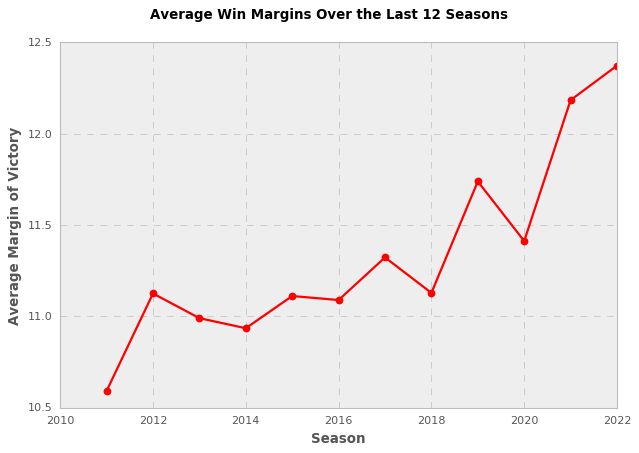

In [198]:
# plot margins of victory
plt.style.use('bmh')
plt.plot(avg_win_margin.index, avg_win_margin["MoV"], marker = "o", color="red")
plt.xlabel("Season", fontweight="bold")
plt.ylabel("Average Margin of Victory", fontweight="bold")
plt.suptitle("Average Win Margins Over the Last 12 Seasons", fontweight="bold",fontsize = "large")
plt.gca().get_xaxis().get_major_formatter().set_useOffset(False)
plt.show()

In [156]:
# separate game_log for each season
game_log_2011 = game_log[game_log["Season"]==2011]
game_log_2012 = game_log[game_log["Season"]==2012]
game_log_2013 = game_log[game_log["Season"]==2013]
game_log_2014 = game_log[game_log["Season"]==2014]
game_log_2015 = game_log[game_log["Season"]==2015]
game_log_2016 = game_log[game_log["Season"]==2016]
game_log_2017 = game_log[game_log["Season"]==2017]
game_log_2018 = game_log[game_log["Season"]==2018]
game_log_2019 = game_log[game_log["Season"]==2019]
game_log_2020 = game_log[game_log["Season"]==2020]
game_log_2021 = game_log[game_log["Season"]==2021]
game_log_2022 = game_log[game_log["Season"]==2022]

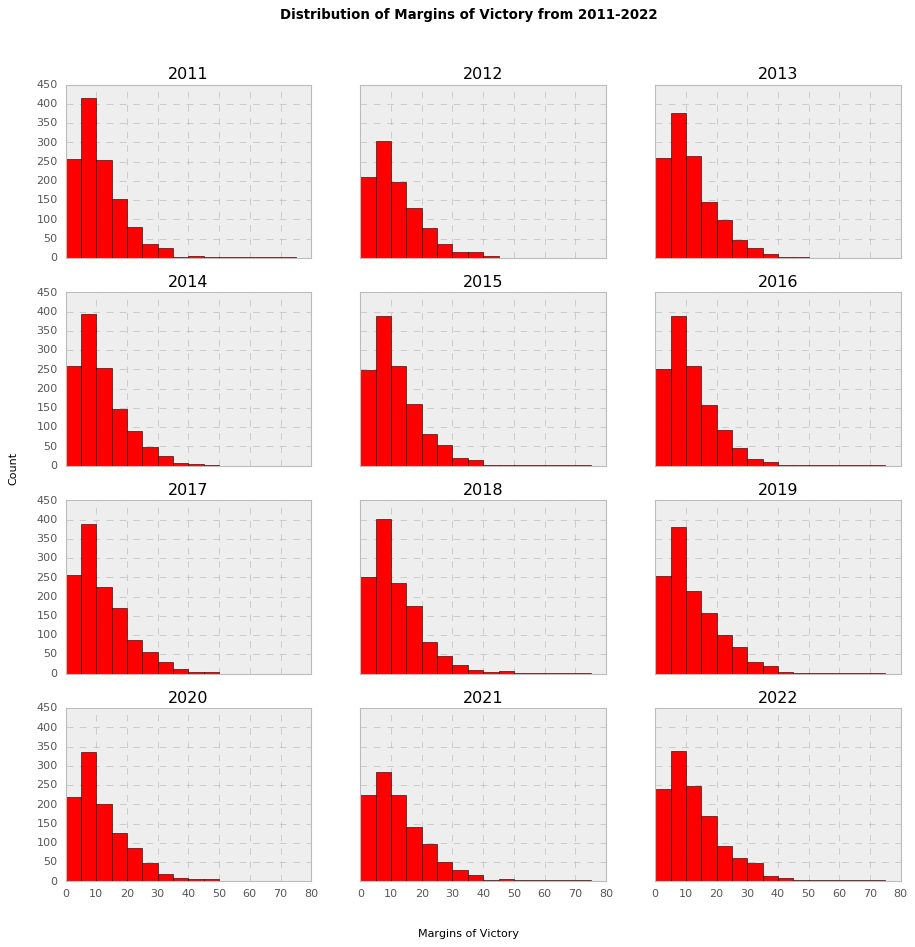

In [222]:
# create small multiples
plt.style.use('bmh')
fig, ax = plt.subplots(4, 3, figsize=(12,12), sharex=True, sharey=True)
ax[0,0].hist(game_log_2011["MoV"], color = "red", edgecolor="black", bins=[0,5,10,15,20,25,30,35,40,45,50,75])
ax[0,0].set_title("2011")
ax[0,1].hist(game_log_2012["MoV"], color = "red", edgecolor="black", bins=[0,5,10,15,20,25,30,35,40,45,50,75])
ax[0,1].set_title("2012")
ax[0,2].hist(game_log_2013["MoV"], color = "red", edgecolor="black", bins=[0,5,10,15,20,25,30,35,40,45,50,75])
ax[0,2].set_title("2013")
ax[1,0].hist(game_log_2014["MoV"], color = "red", edgecolor="black", bins=[0,5,10,15,20,25,30,35,40,45,50,75])
ax[1,0].set_title("2014")
ax[1,1].hist(game_log_2015["MoV"], color = "red", edgecolor="black", bins=[0,5,10,15,20,25,30,35,40,45,50,75])
ax[1,1].set_title("2015")
ax[1,2].hist(game_log_2016["MoV"], color = "red", edgecolor="black", bins=[0,5,10,15,20,25,30,35,40,45,50,75])
ax[1,2].set_title("2016")
ax[2,0].hist(game_log_2017["MoV"], color = "red", edgecolor="black", bins=[0,5,10,15,20,25,30,35,40,45,50,75])
ax[2,0].set_title("2017")
ax[2,1].hist(game_log_2018["MoV"], color = "red", edgecolor="black", bins=[0,5,10,15,20,25,30,35,40,45,50,75])
ax[2,1].set_title("2018")
ax[2,2].hist(game_log_2019["MoV"], color = "red", edgecolor="black", bins=[0,5,10,15,20,25,30,35,40,45,50,75])
ax[2,2].set_title("2019")
ax[3,0].hist(game_log_2020["MoV"], color = "red", edgecolor="black", bins=[0,5,10,15,20,25,30,35,40,45,50,75])
ax[3,0].set_title("2020")
ax[3,1].hist(game_log_2021["MoV"], color = "red", edgecolor="black", bins=[0,5,10,15,20,25,30,35,40,45,50,75])
ax[3,1].set_title("2021")
ax[3,2].hist(game_log_2022["MoV"], color = "red", edgecolor="black", bins=[0,5,10,15,20,25,30,35,40,45,50,75])
ax[3,2].set_title("2022")
fig.suptitle("Distribution of Margins of Victory from 2011-2022", fontweight="bold",fontsize = "large")
fig.supxlabel("Margins of Victory")
fig.supylabel("Count")
plt.show()

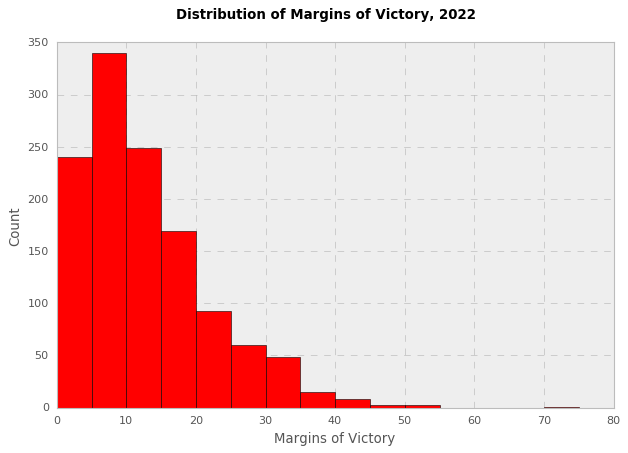

In [213]:
# focus in on 2022 histogram
plt.hist(game_log_2022["MoV"], color = "red", edgecolor="black",bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75])
plt.xlabel("Margins of Victory")
plt.ylabel("Count")
plt.suptitle("Distribution of Margins of Victory, 2022", fontweight="bold", fontsize = "large")
plt.show()

In [259]:
# Top 10 biggest blowouts of 2022
top_10_blowouts = game_log[game_log["Season"]==2022].sort_values("MoV", ascending=False).head(10).drop(["Date","Start (ET)","OT?","Attend.","Notes","Season"], axis="columns")
top_10_blowouts

,Visitor/Neutral,PTS_Visitor,Home/Neutral,PTS_Home,Arena,MoV
13297,Oklahoma City Thunder,79,Memphis Grizzlies,152,FedEx Forum,73
13676,Sacramento Kings,75,Boston Celtics,128,TD Garden,53
14194,Oklahoma City Thunder,88,Los Angeles Clippers,138,Crypto.com Arena,50
14176,Portland Trail Blazers,78,Dallas Mavericks,128,American Airlines Center,50
13830,Boston Celtics,135,Philadelphia 76ers,87,Wells Fargo Center,48
13572,Detroit Pistons,87,Chicago Bulls,133,United Center,46
13452,Toronto Raptors,99,Cleveland Cavaliers,144,Rocket Mortgage Fieldhouse,45
13212,Memphis Grizzlies,95,Minnesota Timberwolves,138,Target Center,43
13936,Portland Trail Blazers,81,Minnesota Timberwolves,124,Target Center,43
12982,Milwaukee Bucks,95,Miami Heat,137,FTX Arena,42


In [263]:
top_10_blowouts.to_csv("top_10_blowouts.csv")

In [258]:
# get the count of games that were won by more than 20 points
blowouts = game_log[game_log["MoV"]>20].groupby(game_log["Season"]).count().filter(["MoV"], axis="columns")

# get the percentage of those games out of the full schedule
game_count = game_log[["Season"]].value_counts()
blowouts = blowouts.merge(game_count.to_frame(), how="left", on="Season")
blowouts["Blowout %"] = blowouts["MoV"]/blowouts[0]
blowouts = blowouts.rename(columns={"MoV": "# of Blowouts", 0: "Total Games", "Blowout %":"Blowout %" })
blowouts

,# of Blowouts,Total Games,Blowout %
Season,,,
2011,134,1230,0.108943
2012,131,990,0.132323
2013,161,1229,0.131001
2014,159,1230,0.129268
2015,155,1230,0.126016
2016,144,1230,0.117073
2017,164,1230,0.133333
2018,154,1230,0.125203
2019,196,1230,0.159350


In [264]:
blowouts.to_csv("blowouts.csv")